# EPFL network - School growth over the years 

In [59]:
import json
import pickle
import collections
from BuildGraphModule import *
from unidecode import unidecode
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [3]:
# Uniform strings - Authors
for i in list(data.keys()):
    try:
        for j in range(len(data[i]['Authors'])):
            t = unidecode(data[i]['Authors'][j])
            t.encode("ascii")
            data[i]['Authors'][j] = t.lower().replace('.','')
            
    except:
        continue

In [4]:
# Uniform strings - EPFL Authors
for i in list(data.keys()):
    dic = []
    try:
        for j in range(len(data[i]['Epfl authors'])):
            string = list(data[i]['Epfl authors'][j].keys())[0]
            t = unidecode(string)
            t.encode("ascii")
            dic += [{t.lower().replace('.','') : list(data[i]['Epfl authors'][j].values())[0]}]
        data[i]['Epfl authors'] = dic
    except:
        continue

In [11]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

In [12]:
# (lab,website)
dict_lab_site = {}
# (lab, num publications)
dict_labs = defaultdict(int)
# (lab, list of papers)
dict_labs_paper = defaultdict(list)
i = 0
for paper in list(data_cut.keys()):
    try:
        if len(data_cut[paper]['Labs involved']) == 1:
            dict_lab_site[list(data_cut[paper]['Labs involved'][0].keys())[0]] = list(data_cut[paper]['Labs involved'][0].values())[0]
            dict_labs[list(data_cut[paper]['Labs involved'][0].keys())[0]] += 1
            dict_labs_paper[list(data_cut[paper]['Labs involved'][0].keys())[0]] += [paper]
            
        else:
            #print ('else')
            for lab in data_cut[paper]['Labs involved']:
                dict_lab_site[list(lab.keys())[0]] = list(lab.values())[0]     
                dict_labs[list(lab.keys())[0]] += 1
                dict_labs_paper[list(lab.keys())[0]] += [paper]
    except:
        continue

In [65]:
dict_labs_paper

defaultdict(list,
            {' IPESE (sci-sti-fm)': ['218716',
              '188153',
              '172036',
              '218377',
              '211922',
              '201852',
              '188137',
              '217932',
              '188145',
              '197284',
              '131175',
              '211584',
              '201977',
              '221498',
              '187472',
              '53535',
              '209953',
              '220321',
              '218004',
              '187724',
              '187065',
              '213700',
              '188158',
              '209980',
              '218331',
              '187723',
              '188157',
              '133178',
              '198704',
              '204803',
              '187783',
              '200097',
              '214833',
              '170096',
              '200072',
              '221585',
              '218949',
              '189840',
              '201975',
              '218000',


In [32]:
# Get the dictionary (lab, dict(year, number of papers))
dict_lab_years = defaultdict(list)
for lab in dict_labs_paper:
    for pub in dict_labs_paper[lab]:
        dict_lab_years[lab] += [data_cut[pub]['Publication date']]
    dict_lab_years[lab] = collections.Counter(dict_lab_years[lab])
    #dict_lab_years[lab]['Total'] = sum(list(dict_lab_years[lab].values()))

In [24]:
# Get dictionary (lab,school)
def school_lab(dict_lab_site, name_school):
    
    school = pickle.load(open(name_school + '.p', 'rb')) # Recall 
    lab_school = {}
    for i in list(dict_lab_site.keys()):
        for nodes in list(school.keys()):
            list_node = school[nodes]
            if i in list_node:
                lab_school[i] = name_school
                break
            else:
                continue   
    
    return lab_school

In [52]:
def school_publication(school, name_school, dict_lab_years, dict_school_pub):
    
    # Get dictionary (school, dict(year,list numb papers))
    
    dict_school_pub[name_school] = defaultdict(list)
    for lab in school:   
        for year in list(dict_lab_years[lab].keys()):
            dict_school_pub[school[lab]][year] += [dict_lab_years[lab][year]]
            
    for year in dict_school_pub[name_school]:
        dict_school_pub[name_school][year] = sum(dict_school_pub[name_school][year])

    return dict_school_pub

In [56]:
list_schools = ['ENAC', 'SB', 'IC', 'STI', 'SV']
dict_school_pub = {}

In [57]:
for school in list_schools:
    sc_labs = school_lab(dict_lab_site, school)
    dict_school_pub = school_publication(sc_labs, school, dict_lab_years, dict_school_pub)

In [58]:
dict_school_pub

{'ENAC': defaultdict(list,
             {'1993': 85,
              '1994': 150,
              '1995': 122,
              '1996': 163,
              '1997': 147,
              '1998': 197,
              '1999': 244,
              '2000': 272,
              '2001': 288,
              '2002': 372,
              '2003': 379,
              '2004': 467,
              '2005': 584,
              '2006': 633,
              '2007': 707,
              '2008': 701,
              '2009': 778,
              '2010': 714,
              '2011': 750,
              '2012': 731,
              '2013': 876,
              '2014': 920,
              '2015': 887,
              '2016': 572}),
 'IC': defaultdict(list,
             {'1993': 53,
              '1994': 63,
              '1995': 84,
              '1996': 117,
              '1997': 145,
              '1998': 180,
              '1999': 185,
              '2000': 170,
              '2001': 177,
              '2002': 215,
              '2003': 273,
     

<Container object of 24 artists>

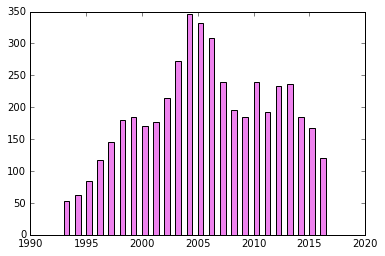

In [62]:
plt.bar(dict_school_pub['IC'].keys(), dict_school_pub['IC'].values(), 0.5, color='violet')

TypeError: unsupported operand type(s) for -: 'str' and 'float'

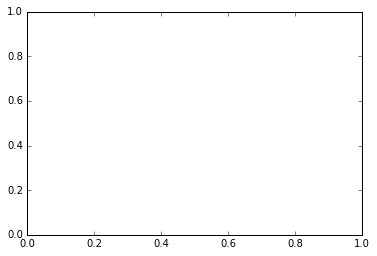

In [64]:
ax = plt.subplot(111)
w = 0.5
ax.bar(list(dict_school_pub['IC'].keys()), dict_school_pub['IC'].values(), width=w, color='b',align='center')
ax.bar(list(dict_school_pub['ENAC'].keys()), dict_school_pub['ENAC'].values(), width=w,color='g',align='center')
ax.bar(list(dict_school_pub['STI'].keys()), dict_school_pub['STI'].values(), width=w,color='r',align='center')
ax.bar(list(dict_school_pub['SB'].keys()), dict_school_pub['SB'].values(), width=w, color='violet',align='center')
ax.bar(list(dict_school_pub['SV'].keys()), dict_school_pub['SV'].values(), width=w,color='yellow',align='center')
#ax.xaxis_date()
ax.autoscale(tight=True)

plt.show()